In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from matplotlib import cm, colors
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

### Input - Output

In [2]:
time_vals   = np.loadtxt("../1I_1O_radius_dis/time.csv")*1e9
time_vals   = np.delete(time_vals,-1)
dic_R       = {}

for seed in range(10):
    
    dic_R[seed] = {R_val : pd.read_csv(f"../1I_1O_radius_dis/data/Nx=7_Ny=7_Nz=1_Ne=2_{R_val}_{seed}.csv") for R_val in [20,40,80,160,320]}

In [13]:
max(dic_R[0].keys())

320

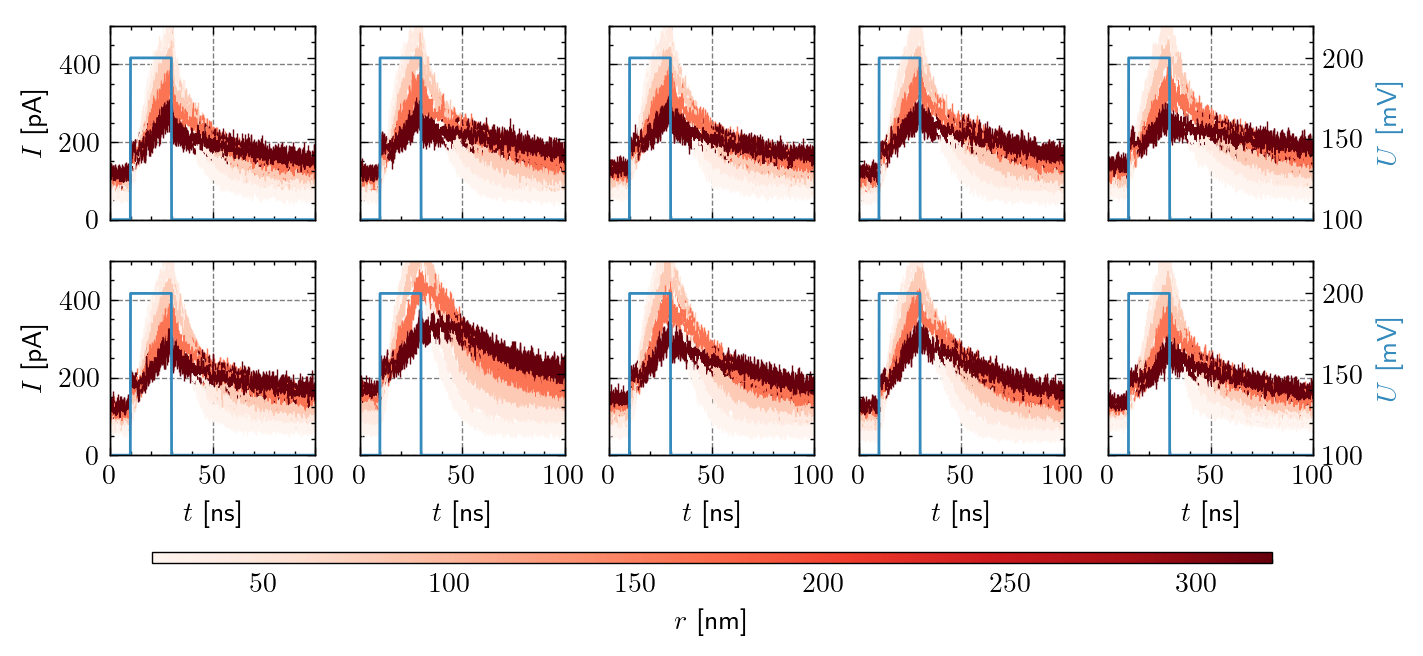

In [43]:
cmap    = plt.get_cmap('Reds')
ncol    = 5
nrow    = 2
norm    = colors.Normalize(min(dic_R[0].keys()), max(dic_R[0].keys()))

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight())

    for seed in range(10):

        ax  = fig.add_subplot(nrow,ncol,seed+1)

        for i, (key, df_base) in enumerate(dic_R[seed].items()):
            # ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(i/(len(dic_R[seed].keys())-1)), label=f'$r = {key}$ nm')
            ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(norm(key)), label=f'$r = {key}$ nm')
            
        if (seed % ncol == 0):
            ax.set_ylabel('$I$ [pA]')
        else:
            ax.set_yticklabels('')
        if (seed >= (nrow*ncol - ncol)):
            ax.set_xlabel('$t$ [ns]')
        else:
            ax.set_xticklabels("")

        # ax.legend(fontsize='x-small', ncol=2)
        ax.set_xlim(0,100)
        ax.set_ylim(0,500)

        ax2 = ax.twinx()
        ax2.plot(time_vals, df_base['E0']*1000, marker='', c=nanonets_utils.blue_color)

        if (seed % ncol == (ncol-1)):
            ax2.set_ylabel('$U$ [mV]', c=nanonets_utils.blue_color)
        else:
            ax2.set_yticklabels('')

        ax2.grid(False)
        ax2.set_ylim(100,220)

    cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', label='$r$ [nm]')